In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
exp2_manifold_1_df = pd.read_csv('./csv/manifold_1.csv', sep=';')

In [3]:
exp2_manifold_1_df

,Pressure,Voltage
0,0.0,0.9100
1,1.0,0.9800
2,1.5,0.9960
3,2.0,1.0250
4,2.5,1.0512
5,3.0,1.0800
6,3.5,1.1100
7,4.0,1.1346
8,4.5,1.1640
9,5.0,1.1930


In [4]:
exp2_manifold_2_df = pd.read_csv('./csv/manifold_2.csv', sep=';')

In [5]:
exp2_manifold_2_df

,Pressure,Voltage
0,0.0,0.901
1,1.0,0.950
2,1.5,0.996
3,2.0,1.020
4,2.5,1.052
5,3.0,1.080
6,3.5,1.110
7,4.0,1.130
8,4.5,1.160
9,5.0,1.190


In [6]:
exp2_nadduv_1_df = pd.read_csv('./csv/nadduv_1.csv', sep=';')

In [7]:
exp2_nadduv_1_df

,Pressure,Voltage
0,0,0.8665
1,10,1.5240
2,20,2.0890
3,25,2.3420
4,30,2.7200
5,35,3.0200
6,40,3.2750
7,45,3.5800
8,45,3.5600
9,50,3.8500


In [8]:
exp2_nadduv_2_df = pd.read_csv('./csv/nadduv_2.csv', sep=';')

In [9]:
exp2_nadduv_2_df

,Pressure,Voltage
0,0,0.86
1,10,1.52
2,20,2.09
3,25,2.42
4,30,2.74
5,35,3.02
6,40,3.25
7,45,3.53
8,50,3.89


In [10]:
def process_data(df):
    P = df['Pressure'].values.reshape(-1, 1)
    V = df['Voltage'].values.reshape(-1, 1)
    
    # Регрессионное моделирование
    model = LinearRegression().fit(V, P)
    k = model.coef_[0][0]
    b = model.intercept_[0]
    
    # Коэффициент детерминации
    R2 = model.score(V, P)
    
    # Расчет корня среднеквадратической ошибки RMSE предсказанных значений и фактических
    P_pred = model.predict(V)
    RMSE = np.sqrt(np.mean((P - P_pred) ** 2))   
    
    # Расчет корня среднеквадратической ошибки RMSE теоретических значений и фактических
    P_theoretical = ((V/222)-0.004)*60*1000/16
    RMSE_teoretical = np.sqrt(np.mean((P - P_theoretical) ** 2))
    return k, b, R2, RMSE, RMSE_teoretical

Обработка данных из всех датафреймов

In [11]:
results = []
for index, df in enumerate([exp2_manifold_1_df, exp2_manifold_2_df, exp2_nadduv_1_df, exp2_nadduv_2_df], start=1):
    k, b, R2, RMSE, RMSE_teoretical = process_data(df)
    results.append((index, k, b, R2, RMSE, RMSE_teoretical))

Вывод результатов

In [12]:
for index, k, b, R2, RMSE, RMSE_teoretical in results:
    print(f"Эксперимент {index}: k={k:.4f}, b={b:.4f}, R2={R2:.4f}, RMSE={RMSE:.4f}, RMSE_теорю={RMSE_teoretical:.4f}")

Эксперимент 1: k=17.7080, b=-16.1511, R2=0.9997, RMSE=0.0539, RMSE_теорю=0.2205
Эксперимент 2: k=17.5179, b=-15.8393, R2=0.9993, RMSE=0.0786, RMSE_теорю=0.1569
Эксперимент 3: k=16.7830, b=-15.0228, R2=0.9991, RMSE=0.4620, RMSE_теорю=0.5681
Эксперимент 4: k=16.7708, b=-15.1218, R2=0.9986, RMSE=0.5824, RMSE_теорю=0.7357


Функция для построения графика

In [13]:
def plot_experiment(df, k, b, R2, RMSE, RMSE_teoretical, name, index):
    plt.scatter(df['Voltage'], df['Pressure'], label='Измеренные данные')
    plt.plot(df['Voltage'], df['Voltage']*k + b, color='red', label='Линейная регрессия')
    plt.plot(df['Voltage'], ((df['Voltage']/222)-0.004)*(60*1000/16), color='green', label='Теоретические значения')
    plt.xlabel('Напряжение, В')
    plt.ylabel('Давление, атм.')
    plt.title(f'{name}\n Замер № {index}')
    plt.text(0.05, 0.95, f'k = {k:.6f}\nb = {b:.6f}\nR² = {R2:.4f}\nRMSE = {RMSE:.6f}\nRMSE_теор. = {RMSE_teoretical:.6f}',
             transform=plt.gca().transAxes,
             verticalalignment='top')
    plt.legend()
    sanitized_name = name.replace(" ", "_")
    plt.savefig(f'./results/{sanitized_name}_{index}.png')
    plt.show()

Построение графиков для всех экспериментов

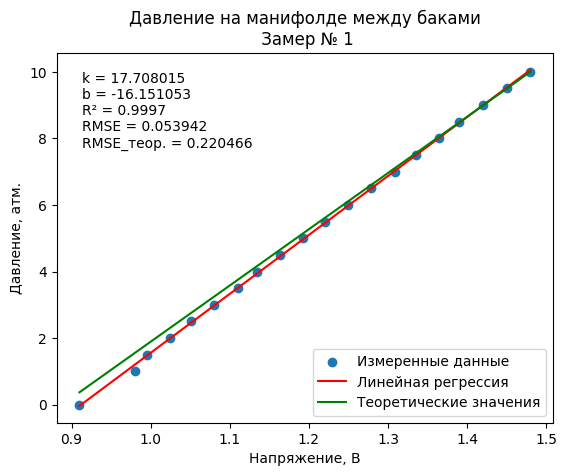

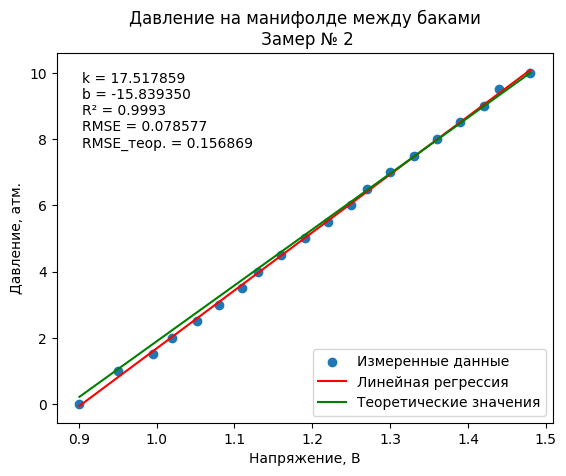

In [14]:
name = 'Давление на манифолде между баками'
for index, df in enumerate([exp2_manifold_1_df, exp2_manifold_2_df], start=1):
    k, b, R2, RMSE, RMSE_teoretical = results[index-1][1:6] 
    plot_experiment(df, k, b, R2, RMSE, RMSE_teoretical, name, index)

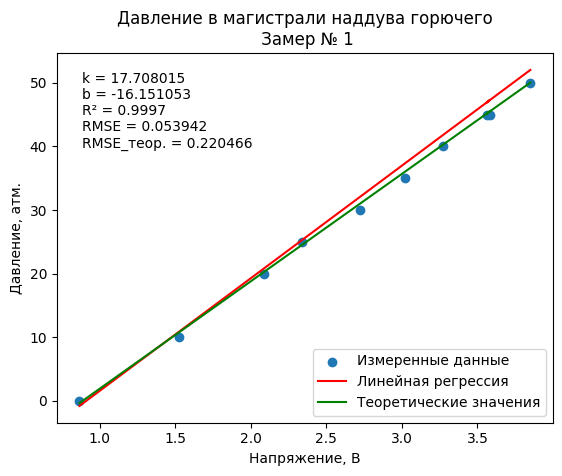

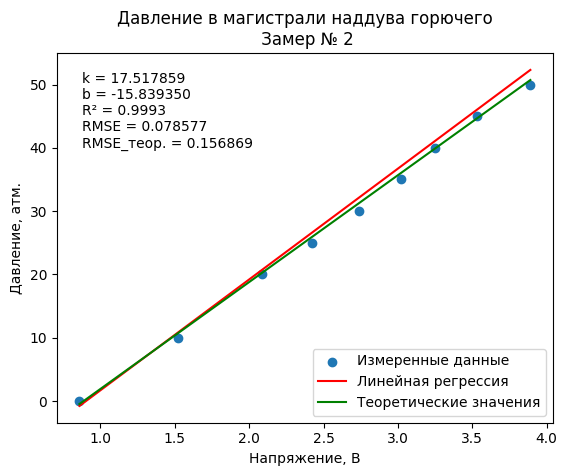

In [15]:
name = 'Давление в магистрали наддува горючего'
for index, df in enumerate([exp2_nadduv_1_df, exp2_nadduv_2_df], start=1):
    k, b, R2, RMSE, RMSE_teoretical = results[index-1][1:6] 
    plot_experiment(df, k, b, R2, RMSE, RMSE_teoretical, name, index)